<a href="https://colab.research.google.com/github/tomepm/Reconocimiento-de-Patrones-y-Aprendizaje-de-Maquina/blob/main/Ejercicio_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 4**
### **Presentado por:** *Pablo Tomé*
**Ejercicio 4:** Elegir uno de entre los siguientes proyectos (se agregan links a las NB correspondientes) y aplicar clasificación para resolverlo. Cada proyecto tiene datasets de diferentes características (texto, imágenes, audio, etc.) por lo que tiene diferente dificultad (indicada con un semaforito).

> ###### **Ejercicio 4.1: Rainbow Guru:** El dataset es un archivo CSV con 865 nombres de color y sus correspondientes valores RGB (red, green, and blue) y el mismo valor en hexadecimal. El objetivo es predecir el nombre de un color dado a partir de su RGB o de su hexadecimal. *Dificultad: Verde*

> ###### **Ejercicio 4.2: COVID-19 Detection in Chest X-Ray Images:** El dataset tiene 600+ imágenes en tres carpetas (COVID-19, normal, neumonía). Desarrollar un extractor de características de las imágenes, y luego entrenar un clasificador. *Dificultad: Amarillo*

> ###### **Ejercicio 4.3: Fake News:** El dataset tiene dos archivos, cada uno con noticias verdaderas o con noticias falsas. Los archivos tienen cuatro columnas (título, texto, asunto, fecha). Entrenar un modelo que dada una noticia prediga si es falsa o no. *Dificultad: Amarillo*

> ###### **Ejercicio 4.4: Winsconsin Breast Cancer dataset:** Contiene una tabla con 569 datos de histología mamaria humana, 357 casos de tejido tumoral benigno y 212 tejido maligno. Los datos son 32 atributos radiómicos (tamaños, formas, texturas, etc.). El objetivo es desarrollar un clasificador que a través de los atributos permita predecir la benignidad o malignidad de un tumor. *Dificultad: Verde*

> ###### **Ejercicio 4.5: Géneros musicales a oído:** El dataset contiene 1,000 audios de 30 segundos cada uno, en 10 géneros musicales diferentes (100 tracks de cada uno, en formato.wav 16 bit mono). Se provee también una notebook para abrir y manipular estos tracks. Extraer features y desarrollar un clasificador que prediga el género musical a partir del audio. *Dificultad: Rojo*

> ###### **Ejercicio 4.6: Transacciones fraudulentas:** El dataset contiene 280.000+ transacciones de tarjetas de crédito de usuarios en Europa durante 2013, de las cuales 492 fueron etiquetadas como fraudulentas. Se presentan 28 variables que corresponden al PCA (por razones de anonimización), además del timestamp y el monto de la transacción. El objetivo es desarrollar un clasificador que detecte cuándo una transacción es fraudulenta. *Dificultad: Amarillo*

> ###### **Ejercicio 4.7: Señales camineras:** El objetivo es obtener un modelo que determine el tipo de señal de tráfico, donde la dificultad es que las tomas fueron realizadas en condiciones realistas. Se provee un dataset etiquetado y dividido en las tres partes (train, validate, test). *Dificultad: Rojo*

**Procedo a elejir el ejercicio 4.4 (Winsconsin Breast Cancer dataset)**. El notebook es https://github.com/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/ProjectBCD

In [33]:
# Importación librerias para trabajar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# Carga del dataset
Df_BCD = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
Df_BCD

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [35]:
# Lectura de los nombres de columnas para tener una idea rápida del dataset
Df_BCD.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [36]:
# Borrado de atributos que no aportan información: 'Unnamed: 32' y 'id'
Df_BCD = Df_BCD.drop(['Unnamed: 32','id'], 1)

<ipython-input-36-555e7e5e49f7>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Df_BCD = Df_BCD.drop(['Unnamed: 32','id'], 1)


**Correlación entre atributos:**

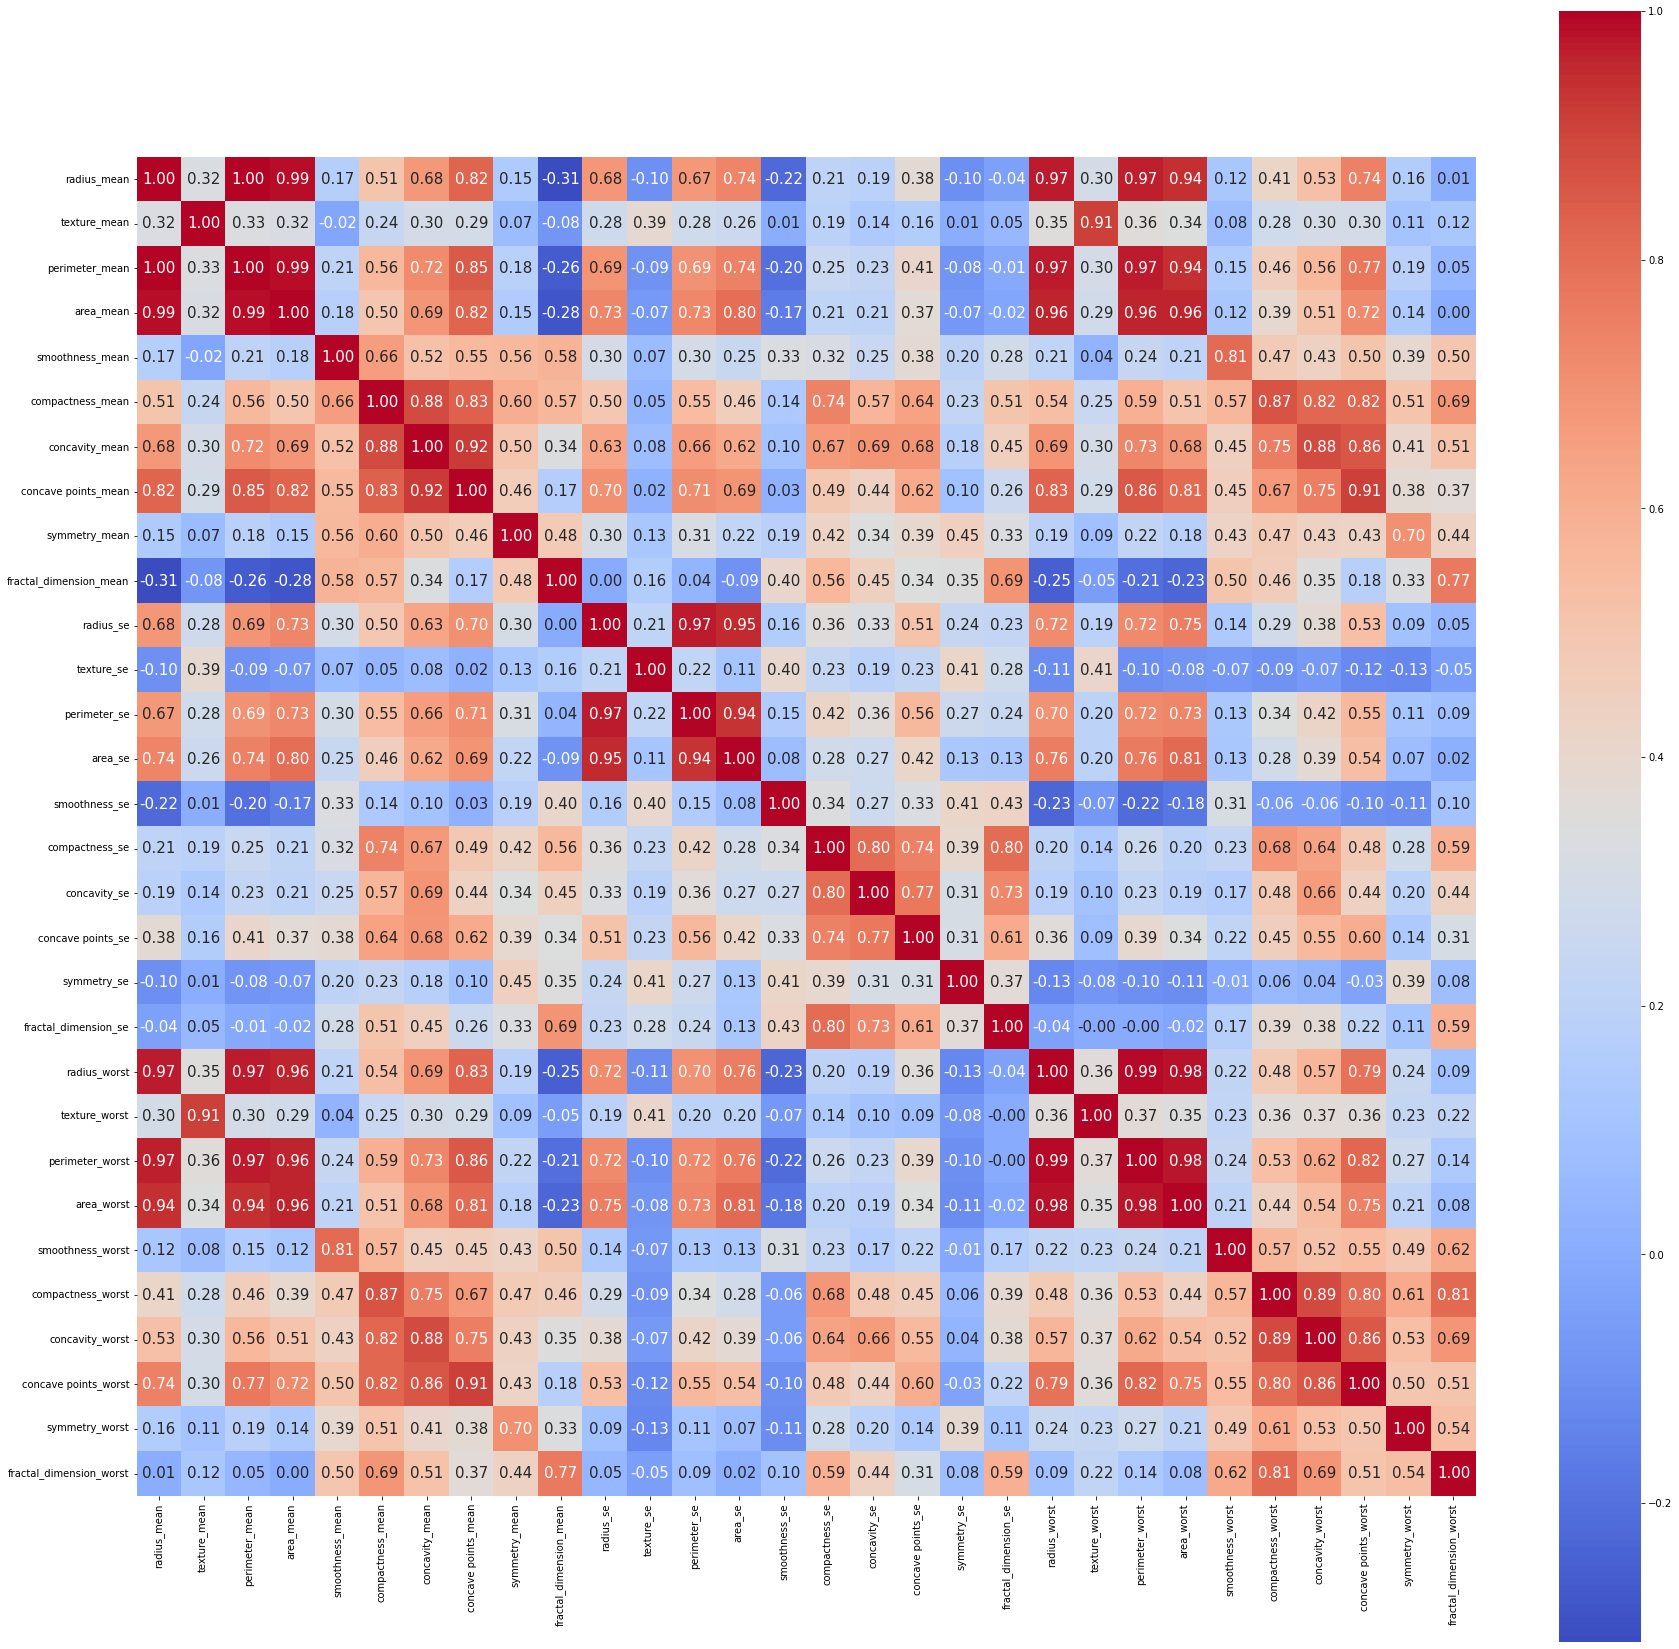

In [37]:
corr = Df_BCD.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

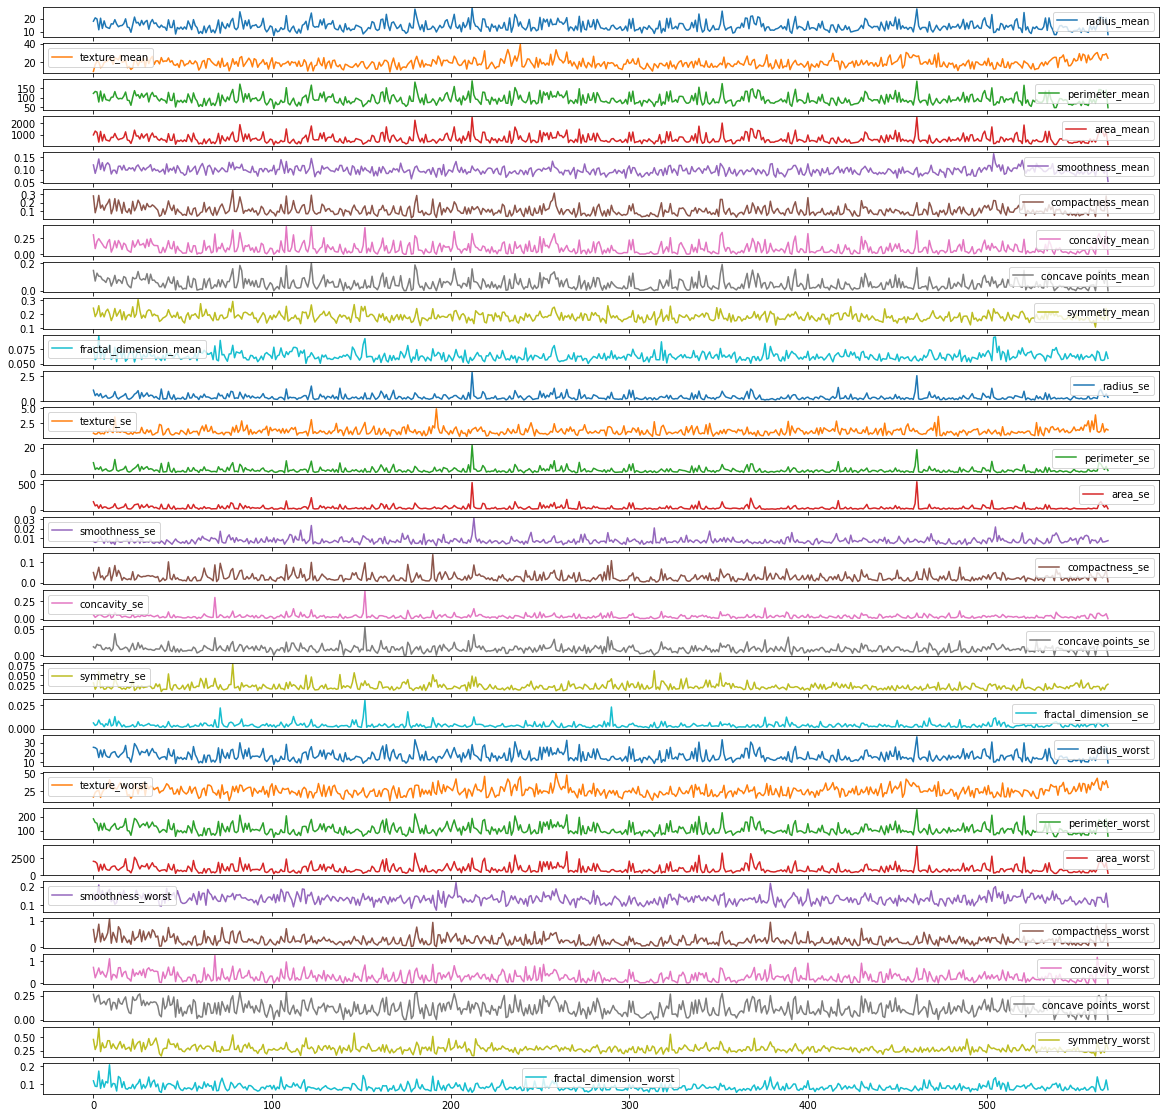

In [38]:
# Se dibuja diagramas con respecto al atributo 'diagnosis'
Df_BCD.plot(label='diagnosis', subplots=True, figsize=(20,20))
plt.show()

**Histología mamaria del dataset que fueron diagnosticadas como benigno o maligno**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


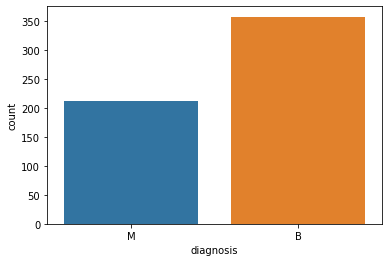

In [39]:
# Se obtiene las cantidades de casos Benignos (B) y Malignos (M)
sns.countplot(Df_BCD['diagnosis'],label="Count")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


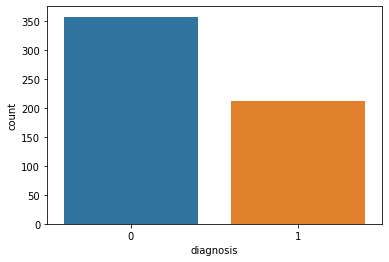

In [40]:
# Se convierten los valores de 'diagnosis' a 1 si es Maligno y a 0 si es Benigno y se procede a graficarlo nuevamente mostrando sus cantidades
Df_BCD['diagnosis']=Df_BCD['diagnosis'].map({'M':1,'B':0})
sns.countplot(Df_BCD['diagnosis'],label="Count")

In [41]:
#@title Seleccione el procentaje de entrenamiento { run: "auto" }
train_size = 0.3 #@param {type:"slider", min:0, max:1, step:0.1}
df_x1 = np.array(Df_BCD.drop(['diagnosis'], 1))
df_y1 = np.array(Df_BCD['diagnosis'])

df_x1_train, df_x1_test, df_y1_train, df_y1_test = train_test_split(df_x1, df_y1, test_size=train_size)
print('Datos para entrenamientos: {} y datos para prueba: {}'.format(df_x1_train.shape[0], df_x1_test.shape[0]))

Datos para entrenamientos: 398 y datos para prueba: 171


<ipython-input-41-19680e90c800>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_x1 = np.array(Df_BCD.drop(['diagnosis'], 1))


**Clasificador KNN vecinos más cercanos**

Se llama al clasificador K vecinos más cercanos de la librería sklearn usando el código .KNeighborsClassifier determinando el número de vecinos cuya distancia se va a comparar. Observamos resultados para n_neighbors = 1, 10, 25 y 50.

*Para el caso de n_neighbors = 1*

In [42]:
# Se clasifica KNN con n_neighbors = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
df_x1_train_1 = df_x1_train
df_y1_train_1 = df_y1_train
knn.fit(df_x1_train_1, df_y1_train_1)
df_y1_pred_1 = knn.predict(df_x1_test)
print('Precisión vecinos más cercanos (KNeighbors=1): {}'.format(metrics.accuracy_score(df_y1_pred_1,df_y1_test)))

Precisión vecinos más cercanos (KNeighbors=1): 0.9298245614035088


*Para el caso de n_neighbors = 10*

In [43]:
# Se clasifica KNN con n_neighbors = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
df_x1_train_10 = df_x1_train
df_y1_train_10 = df_y1_train
knn.fit(df_x1_train_10, df_y1_train)
df_y1_pred_10 = knn.predict(df_x1_test)
print('Precisión vecinos más cercanos (KNeighbors=10): {}'.format(metrics.accuracy_score(df_y1_pred_10,df_y1_test)))

Precisión vecinos más cercanos (KNeighbors=10): 0.9122807017543859


*Para el caso de n_neighbors = 25*

In [44]:
# Se clasifica KNN con n_neighbors = 25
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
df_x1_train_25 = df_x1_train
df_y1_train_25 = df_y1_train
knn.fit(df_x1_train_25, df_y1_train_25)
df_y1_pred_25 = knn.predict(df_x1_test)
print('Precisión vecinos más cercanos (KNeighbors=25): {}'.format(metrics.accuracy_score(df_y1_pred_25,df_y1_test)))

Precisión vecinos más cercanos (KNeighbors=25): 0.9122807017543859


*Para el caso de n_neighbors = 50*

In [45]:
# Se clasifica KNN con n_neighbors = 50
knn = neighbors.KNeighborsClassifier(n_neighbors=50)
df_x1_train_50 = df_x1_train
df_y1_train_50 = df_y1_train
knn.fit(df_x1_train_50, df_y1_train_50)
df_y1_pred_50 = knn.predict(df_x1_test)
print('Precisión vecinos más cercanos (KNeighbors=50): {}'.format(metrics.accuracy_score(df_y1_pred_50,df_y1_test)))

Precisión vecinos más cercanos (KNeighbors=50): 0.9005847953216374


**Clasificador C-Support Vector Classification (SVC)**

SVC es la clase principal ofrecida por Scikit-learn. Está implementada sobre la librería libsvm y la función de coste viene determinada por el parámetro C que ya hemos visto. El parámetro kernel especifica el tipo de kernel a usar. Las implementaciones nativas son "linear", "poly", "rbf" y "sigmoid". También es posible usar kernels desarrollados a medida.

In [46]:
model = svm.SVC()
model.fit(df_x1_train, df_y1_train)
df_y1_pred_svm = model.predict(df_x1_test)
print('Precisión SVC: {}'.format(metrics.accuracy_score(df_y1_pred_svm,df_y1_test)))
     

Precisión SVC: 0.9005847953216374


In [47]:
print(metrics.confusion_matrix(df_y1_test, df_y1_pred_svm, labels=[0, 1]))
print(metrics.classification_report(df_y1_test, df_y1_pred_svm, labels=[0, 1]))

[[96  3]
 [14 58]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        99
           1       0.95      0.81      0.87        72

    accuracy                           0.90       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.90      0.90       171



Text(0.5, 15.0, 'df_y1_pred_svm')

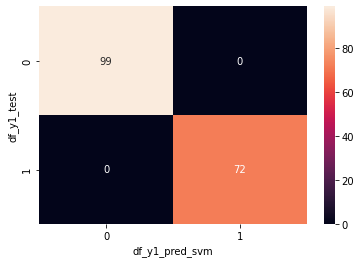

In [48]:
cm = confusion_matrix(df_y1_test, df_y1_test , labels=[0, 1])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('df_y1_test')
ax.set_xlabel('df_y1_pred_svm')

**Random Forests**

Un modelo Random Forest está formado por un conjunto (ensemble) de árboles de decisión individuales, cada uno entrenado con una muestra aleatoria extraída de los datos de entrenamiento originales. El siguiente paso es llamar al clasificador Random Forests de la librería sklearn usando el código .RandomForestClassifier determinando el número de estimadores. Observamos resultados para n_estimators = 10 y 100.

*n_estimators = 10*

In [49]:
# Se clasifica KNN con n_estimators = 10
model=RandomForestClassifier(n_estimators=10)
model.fit(df_x1_train, df_y1_train)
df_y1_pred_rfc_10 = model.predict(df_x1_test)
print('Precisión RandomForest (n_estimators = 10): {}'.format(metrics.accuracy_score(df_y1_pred_rfc_10,df_y1_test)))

Precisión RandomForest (n_estimators = 10): 0.9590643274853801


n_estimators = 100

In [50]:
# Se clasifica KNN con n_estimators = 100
model=RandomForestClassifier(n_estimators=100)
model.fit(df_x1_train, df_y1_train)
df_y1_pred_rfc_100 = model.predict(df_x1_test)
print('Precisión RandomForest (n_estimators = 100): {}'.format(metrics.accuracy_score(df_y1_pred_rfc_100,df_y1_test)))

Precisión RandomForest (n_estimators = 100): 0.9590643274853801


**Clasificador Regresión Logística**

A pesar de su nombre, no es un algoritmo de regresión en el que se prediga un valor continuo, sino que es un método para problemas de clasificación binaria.

Precisión Logistic Regression: 0.9532163742690059
[[94  5]
 [ 3 69]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        99
           1       0.93      0.96      0.95        72

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Text(0.5, 15.0, 'df_y1_pred_crl')

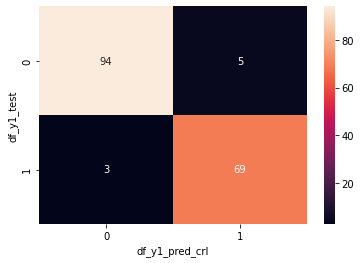

In [51]:
model=LogisticRegression(random_state=0,max_iter = 10000)
model.fit(df_x1_train, df_y1_train)
df_y1_pred_crl = model.predict(df_x1_test)
print('Precisión Logistic Regression: {}'.format(metrics.accuracy_score(df_y1_pred_crl,df_y1_test)))
print(metrics.confusion_matrix(df_y1_test, df_y1_pred_crl, labels=[0, 1]))
print(metrics.classification_report(df_y1_test, df_y1_pred_crl, labels=[0, 1]))
cm = confusion_matrix(df_y1_test, df_y1_pred_crl , labels=[0, 1])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('df_y1_test')
ax.set_xlabel('df_y1_pred_crl')

**KNN Óptimo**

GridSearchCV permite encontrar el vecino con mayor precision

In [52]:
n_splits = 4
knn = KNeighborsClassifier()
k_range = list(range(1, int(np.sqrt(df_x1.shape[0]))))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=n_splits, scoring='accuracy', return_train_score=False,verbose=3)
grid_search=grid.fit(df_x1, df_y1)

Fitting 4 folds for each of 22 candidates, totalling 88 fits
[CV 1/4] END .....................n_neighbors=1;, score=0.881 total time=   0.0s
[CV 2/4] END .....................n_neighbors=1;, score=0.923 total time=   0.0s
[CV 3/4] END .....................n_neighbors=1;, score=0.923 total time=   0.0s
[CV 4/4] END .....................n_neighbors=1;, score=0.915 total time=   0.0s
[CV 1/4] END .....................n_neighbors=2;, score=0.881 total time=   0.0s
[CV 2/4] END .....................n_neighbors=2;, score=0.923 total time=   0.0s
[CV 3/4] END .....................n_neighbors=2;, score=0.951 total time=   0.0s
[CV 4/4] END .....................n_neighbors=2;, score=0.887 total time=   0.0s
[CV 1/4] END .....................n_neighbors=3;, score=0.888 total time=   0.0s
[CV 2/4] END .....................n_neighbors=3;, score=0.930 total time=   0.0s
[CV 3/4] END .....................n_neighbors=3;, score=0.965 total time=   0.0s
[CV 4/4] END .....................n_neighbors=3;

In [53]:
k = grid_search.best_params_['n_neighbors']
knn_model = KNeighborsClassifier(k)
print(f'Mejor modelo: {str(knn_model)}')
print(f'=> Accuracy promedio en entrenamiento Grid: {grid_search.best_score_:.4f}')

Mejor modelo: KNeighborsClassifier(n_neighbors=14)
=> Accuracy promedio en entrenamiento Grid: 0.9333


# **ANALISIS DE RESULTADOS**

Se analiza la importancia de cada atributo mediante la visualización y la correlación de los datos utilizando la función. corr(), los atributos que no aportan significancia son eliminados.

Cada clasificador es evaluado a diferentes parámetros:
Para KNN vecinos más cercanos se evalúa a 1, 10, 25 y 50 vecinos;
Para Random Forests se evalúa a 10 y 100 estimadores cada evaluación imprime la presión del modelo, a fin de que el usuario pueda seleccionar el valor para estos parámetros se agregan scrollbar.

Observamos los siguientes resultados:

*KNN: n_neighbors = 1, precisión: 0.8771929824561403*

*KNN: n_neighbors = 10, precisión: 0.9005847953216374*

*KNN: n_neighbors = 25, precisión: 0.8888888888888888*

*KNN: n_neighbors = 50, precisión: 0.8713450292397661*

*SVC: precisión: 0.9064327485380117*

*Random Forests: n_estimators = 10, precisión: 0.9298245614035088*

*Random Forests: n_estimators = 100, precisión: 0.9415204678362573*

*Logistic Regression: precisión: 0.9181286549707602*

**Finalmente, el clasificador con mayor precisión es: Random Forests n_estimators = 100.**